# Kalman Filter

In [9]:
import sys, os, pprint
sys.path.append(os.path.abspath('../'))

import ptp.reader
import ptp.datasets
import ptp.kalman
import ptp.ls
import ptp.metrics
import ptp.frequency
import ptp.window
import ptp.bias
import numpy as np
import analyze
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
args = analyze.parse_args()

## Datasets

### Load testbed data

In [48]:
 ## Customize some parameters
args.file     = "serial-20200726-230128-comp"
args.verbose  = 4
args.num_iter = 0
args.optimizer_force = True

In [49]:
analyze.setup(args) 

In [50]:
ds = analyze.read_dataset(args) 

In [51]:
T_ns = ds['data'].metadata['sync_period']*1e9

## Run Kalman

In [52]:
def _run_kalman(data, T_ns, cache, force):
    analyze._run_foffset_estimation(data)
    analyze._run_kalman(data, T_ns, cache, force)

In [53]:
_run_kalman(ds['data'].data, T_ns, ds['cache'], force=args.optimizer_force)

[[1.e-18 0.e+00]
 [0.e+00 1.e-02]]


### Run LS

In [54]:
def _run_ls(data, T_ns, filename):
    # Window optimize
    window_optimizer = ptp.window.Optimizer(data, T_ns, filename) 
    window_optimizer.process('ls')
    N_ls = window_optimizer.est_op["ls"]["N_best"]

    analyze._run_ls(data, N_ls, T_ns)

In [55]:
_run_ls(ds['data'].data, T_ns, ds['path'])

### Analyze

Setup:
{
    "calibration": false,
    "calibration_duration": 0,
    "departure_ctrl": false,
    "departure_gap": {},
    "duration": "0:59:59.992309",
    "fh_traffic": null,
    "hops": {
        "rru1": 4,
        "rru2": 4
    },
    "n_exchanges": 460800,
    "n_rru_ptp": 2,
    "oscillator": "xo",
    "pipelines": {
        "bbu": "3433",
        "rru": "3433"
    },
    "ptp_unicast": false,
    "start_time": "2020-07-26 22:57:51",
    "sync_period": 0.0078125,
    "sync_rate": 128,
    "tstamp_latency_corr": {
        "bbu": {
            "rx": 80,
            "tx": 80
        },
        "rru1": {
            "rx": 80,
            "tx": 80
        },
        "rru2": {
            "rx": 80,
            "tx": 80
        }
    }
}
Checking sequenceIDs: OK (no gaps)
DL FH delay for rru1: best-case: 16.5600 us worst-case: 16.9600 us
UL FH delay for rru1: best-case: 16.5600 us worst-case: 16.9600 us 
DL FH delay for rru2: best-case: 16.5600 us worst-case: 16.9600 us
UL FH delay for

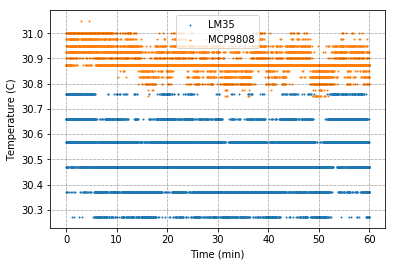

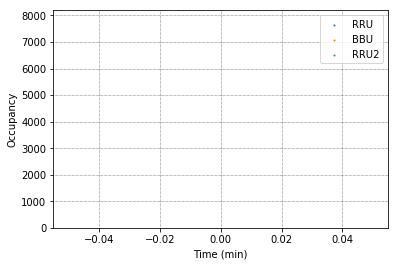

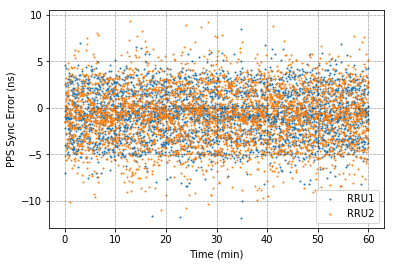

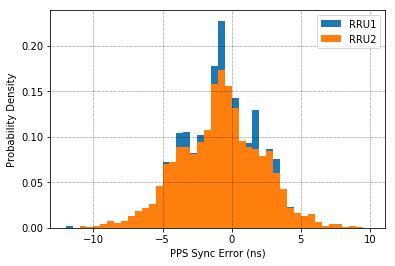

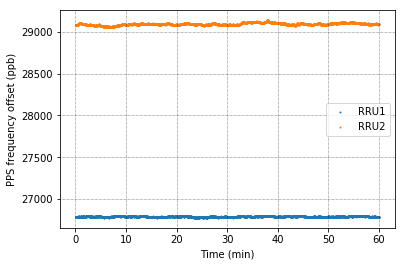

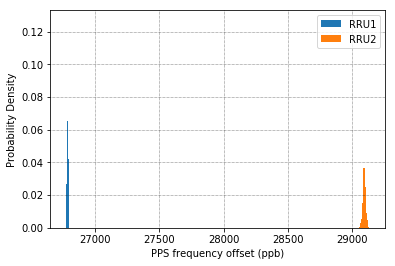

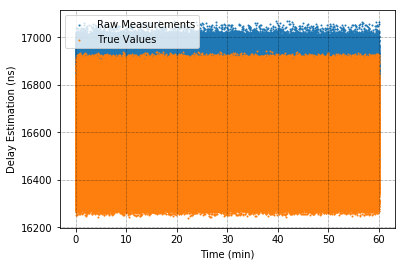

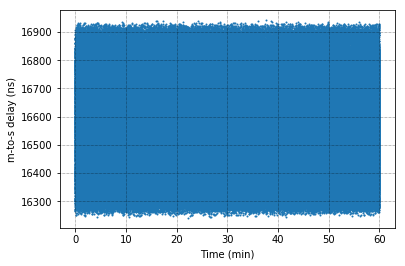

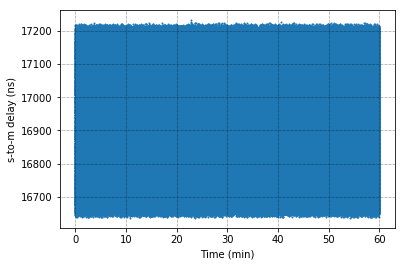

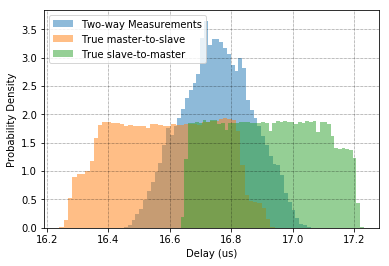

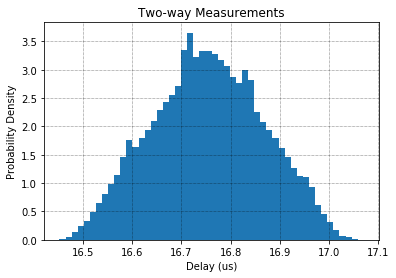

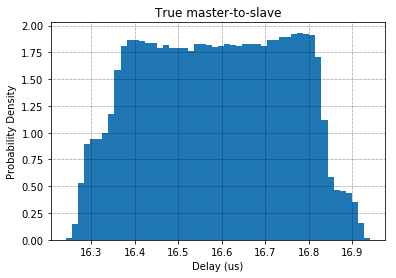

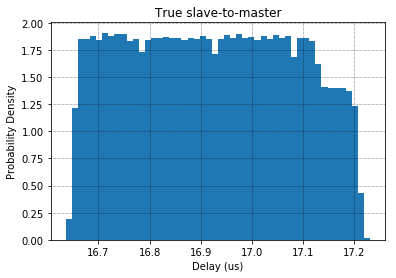

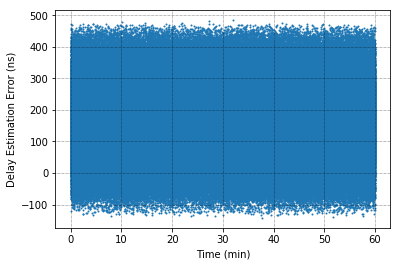

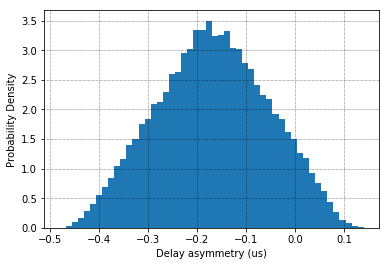

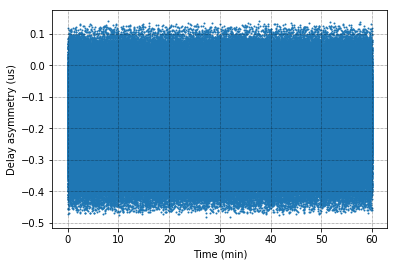

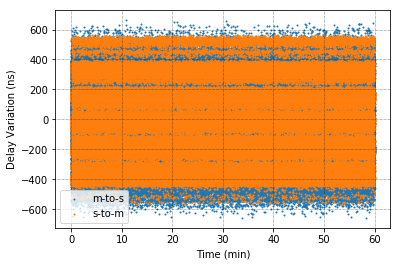

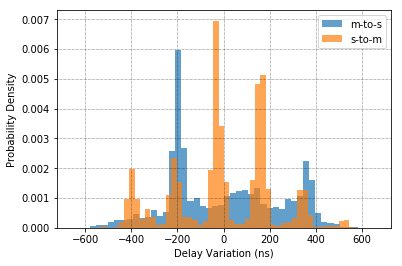

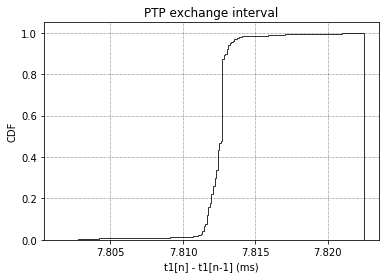

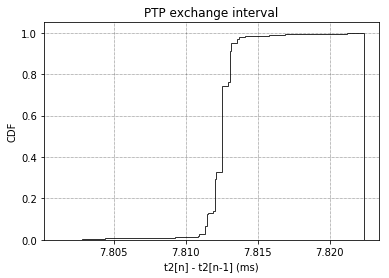

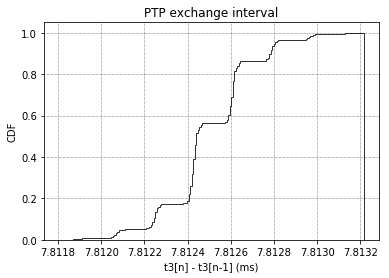

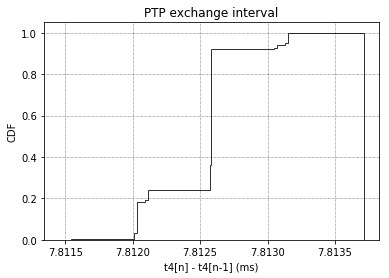

Average no. of PTP exchanges per second: 128.000273

Delay asymmetry analysis:

Metric 	      m-to-s	      s-to-m	   asymmetry
Average	 16585.13 ns	 16921.52 ns	  -168.20 ns
Std Dev	   162.20 ns	   157.89 ns	   113.48 ns
Minimum	 16241.00 ns	 16636.00 ns	  -197.50 ns
Maximum	 16942.00 ns	 17232.00 ns	  -145.00 ns
Median	 16587.00 ns	 16921.00 ns	  -167.00 ns
Mode	 16743.00 ns	 16900.00 ns	   -78.50 ns


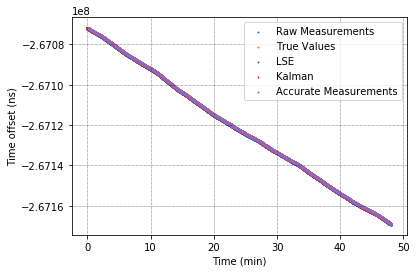

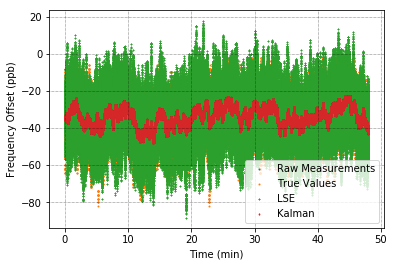

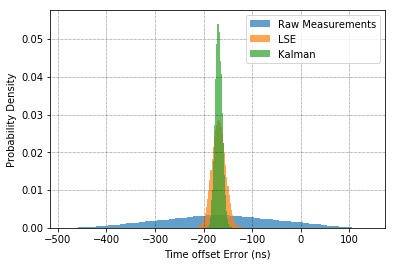

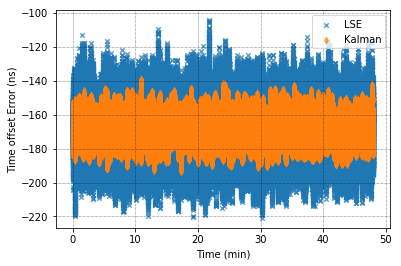

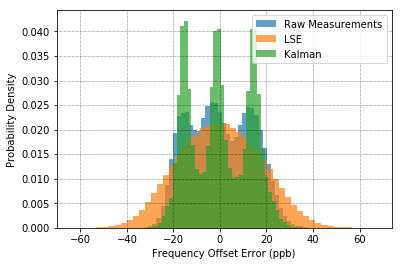

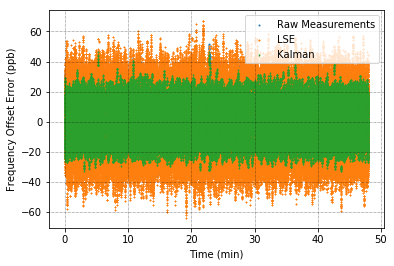

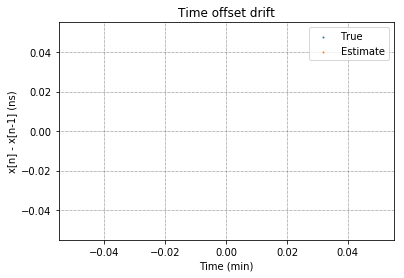

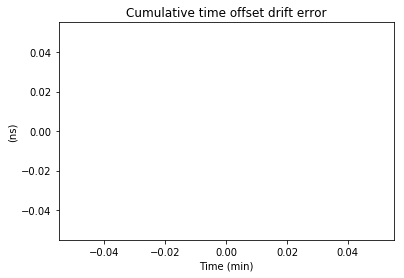

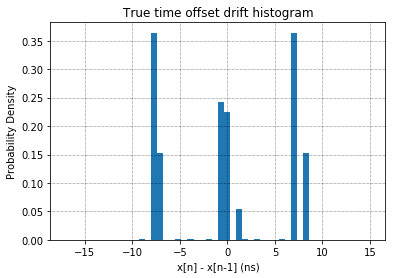

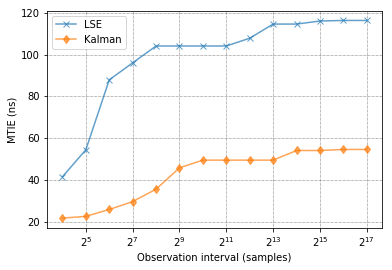

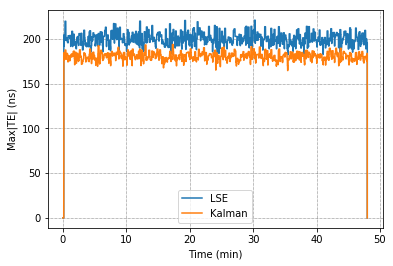


Time offset estimation error statistics:

x_est                 Mean: -169.056 ns  Sdev:  113.573 ns  RMS:   203.663 ns
x_ls_eff              Mean: -169.058 ns  Sdev:   13.772 ns  RMS:   169.618 ns
x_kf                  Mean: -169.042 ns  Sdev:    7.076 ns  RMS:   169.190 ns

Frequency offset estimation error statistics:

y_est                 Mean:    0.053 ppb  Sdev:   13.561 ppb  RMS:    13.561 ppb
y_ls_eff              Mean:    0.000 ppb  Sdev:   17.365 ppb  RMS:    17.365 ppb
y_kf                  Mean:    0.843 ppb  Sdev:   27.352 ppb  RMS:    27.365 ppb

Time offset drift estimation error statistics:


Performance ranking based on max-te:

x_kf                 Mean:  180.868 ns
x_ls_eff             Mean:  201.299 ns
x_est                Mean:  453.458 ns

Performance ranking based on mtie:

x_kf                 Mean:   42.540 ns
x_ls_eff             Mean:   98.723 ns
x_est                Mean:  608.786 ns

Performance ranking based on rms:

x_kf                 Mean:  169.190 n

In [56]:
%matplotlib inline
analyze.analyze(ds, args, save=False)